<a href="https://colab.research.google.com/github/amanmehra-23/compute/blob/main/Compute_LogReg_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

###Q1 Import the dataset and try to understand what information each column is giving. What is our target variable? Is this a classification or regression problem?

Dataset link: https://drive.google.com/file/d/1A-iAsI3MUU6o9oh5AE1NG1kVU5KD60Ms/view?usp=sharing


In [3]:
#Import dataset
df = pd.read_csv("heart_study.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.shape

(4240, 16)

sex : male or female (Nominal)

age : age of the patient (Continuous)

education: maximum level of education of the patient

currentSmoker : whether or not the patient is a current smoker (Nominal)

cigsPerDay : the number of cigarettes that the person smoked on average in one day (Continuous)

BPMeds : whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke : whether or not the patient had previously had a stroke (Nominal)

prevalentHyp : whether or not the patient was Hypertension (Nominal)

diabetes : whether or not the patient had diabetes (Nominal)

totChol : total cholesterol level (Continuous)

sysBP : systolic blood pressure (Continuous)

diaBP : diastolic blood pressure (Continuous)

BMI : Body Mass Index (Continuous)

heartRate : heart rate (Continuous)

glucose : glucose level (Continuous)

TenYearCHD : 10 year risk of Coronary Heart Disease (CHD) (binary: 1 (Yes), 0 (No))

###Q2. Are there any columns which give information about something totally irrelevant to whether a person has a heart disease or not? If yes, drop the column. Also rename the column 'male' to 'sex_male'.

In [6]:
#drop and/or rename columns
df = df.drop(["education"], axis =1)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
df.columns = ["sex_male" if col== "male" else col for col in df.columns]
df.columns

Index(['sex_male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

###Q3. Find the number of null values in each column and decide whether you can drop them or not. If you cannot drop them, use an appropriate method to deal with them

In [8]:
#Deal with null values
df.isna().sum()

sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
df['heartRate'].dropna(inplace=True)

In [10]:
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['totChol'].fillna(df['totChol'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['BPMeds'].fillna(0, inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)

In [18]:
df.dropna(inplace=True)

###Q4. The following code is set up for you, replace 'dataframe' with the name of the your variable. What do you understand from this EDA? Why do some graphs have only two bars, at 0 and 1 and others have multiple?

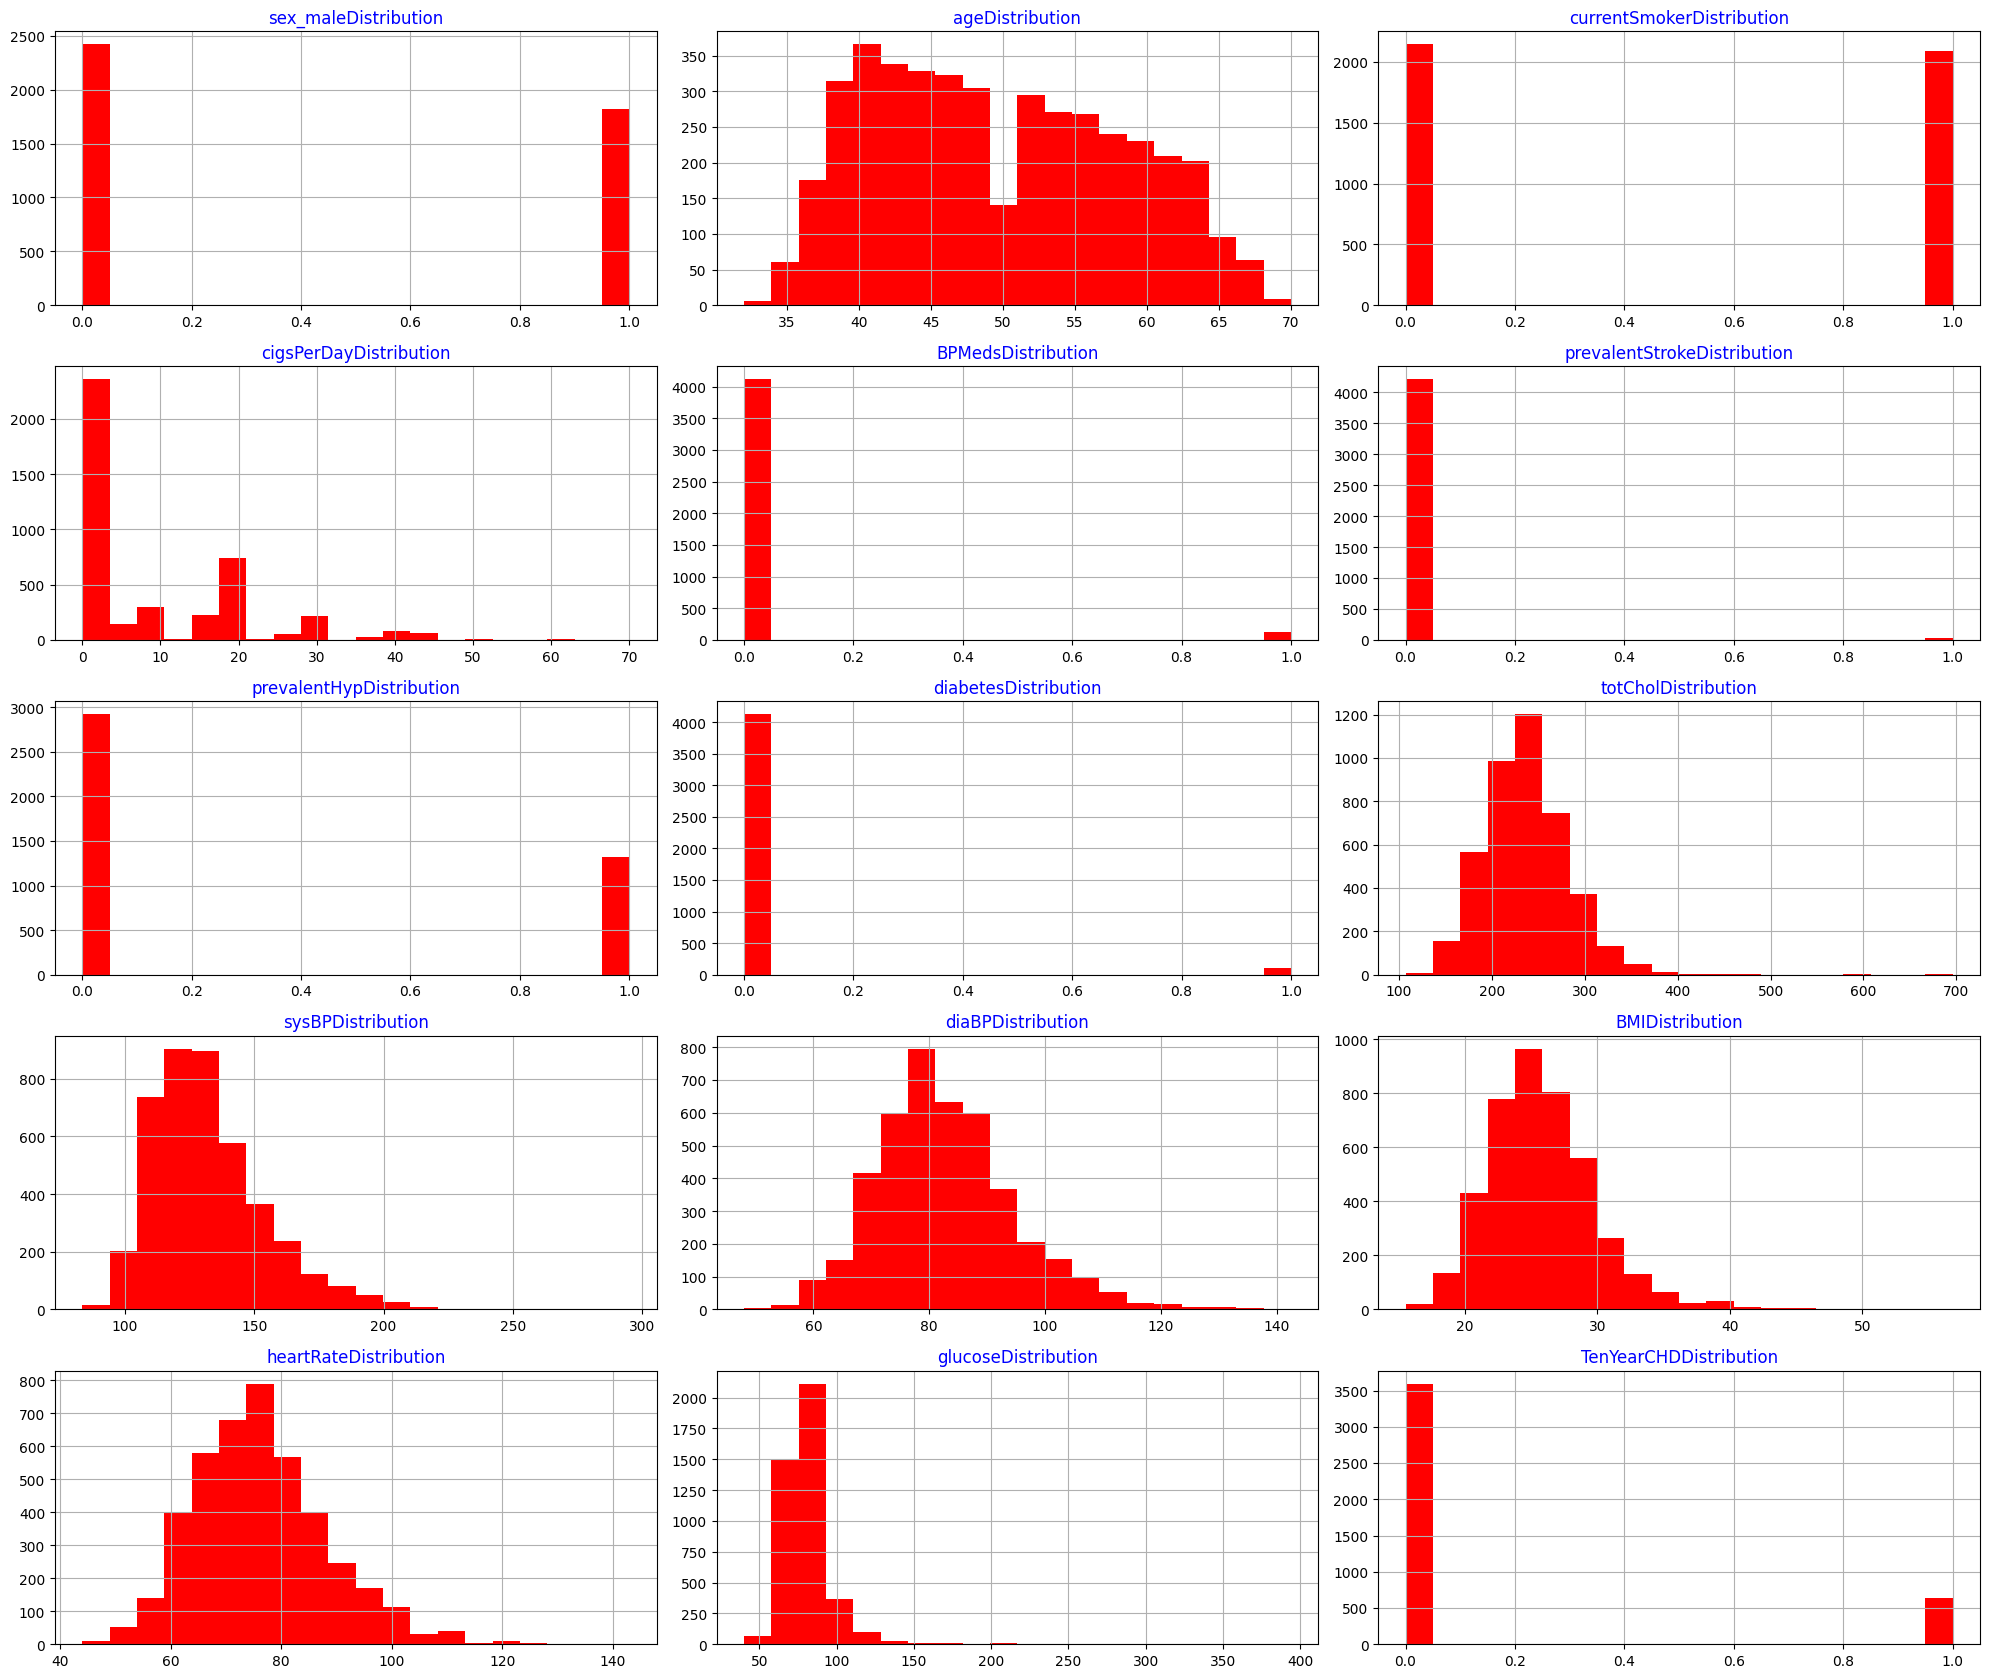

In [19]:
def draw_histograms(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=20,ax=ax,facecolor='red')
        ax.set_title(feature+"Distribution", color='blue')
    fig.tight_layout()
    plt.show()
draw_histograms(df, df.columns, 6, 3)

The column sex male the 0 value gives count of females and 1 count gives the count of males
Current smoker distribution gives us count of people who smoke(1) and count of people who do not smoke(0)
All such 1,0 columns just denote 1 for the condition to be true and 0 for the condition ot be false
The continuos distribution column give us the aprroximate range like age Distribution giving us how we have people younder than 35 to all way till 70 in the database.


###Q5. Using sns.countplot find out number of Positive cases and Negative cases in the dataset, i.e., in your target column.

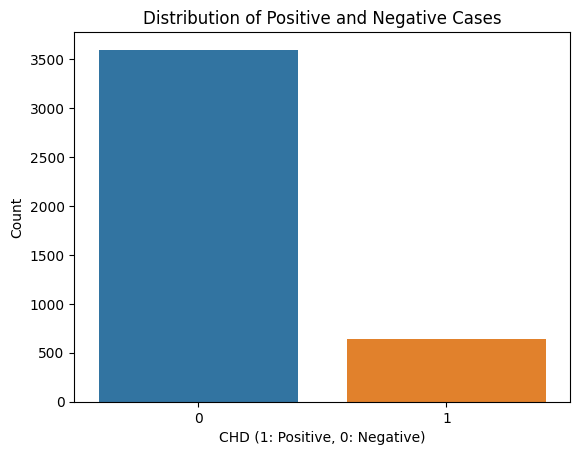

In [20]:

sn.countplot(x='TenYearCHD', data=df)

plt.xlabel('CHD (1: Positive, 0: Negative)')
plt.ylabel('Count')
plt.title('Distribution of Positive and Negative Cases')

plt.show()


###Q6a. Split the dataset into train and test and fit the training dataset in the Logistic Regression.

In [21]:
#Split the dataset and fit the model
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y= df.iloc[:,-1]
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

###Q6b. Does running the above code give a Convergence Warning? What could be the cause of this problem? Try to find out methods that can deal with this problem.

Although there are several methods, we will use backward feature selection to solve this problem. You can learn more about feature selection using the below link.

https://www.javatpoint.com/feature-selection-techniques-in-machine-learning

Understand and run the following 4 cells which carry out backward feature selection for you. Make sure to replace 'df' by your dataframe variable

In [23]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

,const,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [24]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols = df_constant.columns[:-1]
model = sm.Logit(df.TenYearCHD, df_constant[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.378393
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4239
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           14
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                  0.1110
Time:                        10:30:20   Log-Likelihood:                -1604.0
converged:                       True   LL-Null:                       -1804.2
Covariance Type:            nonrobust   LLR p-value:                 1.034e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.1753      0.644    -12.692      0.000      -9.438      -6.913
sex_male            0.5019      0.100      5.000      0.000       0.305       0.699
age                 0.0623      0.006     10.100      0.000       0.050       0.074
currentSmoker       0.0114      0.143      0.080      0.936      -0.269       0.292
cigsPerDay          0.0214      0.006      3.797      0.000       0.010       0.032
BPMeds              0.2451      0.220      1.114      0.265      -0.186       0.676
prevalentStroke     0.9682      0.441      2.195      0.028       0.104       1.833
prevalentHyp        0.2280      0.128      1.774      0.076      -0.024       0.480
diabetes            0.1946      0.294      0.662      0.508      -0.382       0.771
totChol             0.0018      0.001      1.799      0.072      -0.000       0.004
sysBP               0.0140      0.004      3.961      0.000       0.007       0.021
diaBP              -0.0026      0.006     -0.439      0.661      -0.014       0.009
BMI                 0.0036      0.012      0.308      0.758      -0.019       0.027
heartRate          -0.0015      0.004     -0.374      0.709      -0.009       0.006
glucose             0.0067      0.002      3.118      0.002       0.002       0.011
===================================================================================
"""

In [25]:
def back_feature_elem (df, dep_var, col_list):
    while len(col_list)>0 :
        model = sm.Logit(dep_var,df[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)
result = back_feature_elem(df_constant, df.TenYearCHD, cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4239
Model:                          Logit   Df Residuals:                     4232
Method:                           MLE   Df Model:                            6
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                  0.1085
Time:                        10:33:49   Log-Likelihood:                -1608.5
converged:                       True   LL-Null:                       -1804.2
Covariance Type:            nonrobust   LLR p-value:                 1.975e-81
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4537      0.390    -21.693      0.000      -9.218      -7.690
sex_male            0.4825      0.097      4.964      0.000       0.292       0.673
age                 0.0647      0.006     10.915      0.000       0.053       0.076
cigsPerDay          0.0216      0.004      5.609      0.000       0.014       0.029
prevalentStroke     1.0482      0.436      2.404      0.016       0.193       1.903
sysBP               0.0170      0.002      8.499      0.000       0.013       0.021
glucose             0.0076      0.002      4.648      0.000       0.004       0.011
===================================================================================
"""

In [26]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue = round(result.pvalues,3)
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)','CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
print((conf))

                 CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                0.000099       0.000457    0.000213   0.000
sex_male             1.339089       1.960221    1.620157   0.000
age                  1.054496       1.079277    1.066815   0.000
cigsPerDay           1.014127       1.029525    1.021797   0.000
prevalentStroke      1.213486       6.704846    2.852409   0.016
sysBP                1.013177       1.021159    1.017161   0.000
glucose              1.004396       1.010840    1.007613   0.000


###Q7. The above table mentions the columns with the highest importance. Create a new dataframe with just these columns and your target column. Split it into training and testing dataset and fit the training data into Logistic regression model. Also predict the y values for the test set.

In [30]:
#Split the new dataset and fit the model
df_new=df[["sex_male","age","cigsPerDay","prevalentStroke","sysBP","glucose","TenYearCHD"]]
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [32]:
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred =model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

###Q8a. Create a confusion matrix for y test and y predcted values. Since this is prediction of heart disease which metric should be given more importance - Precision or Recall? Justify.

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score

In [45]:
#Code for confusion matrix

confusion_mat = confusion_matrix(y_test, y_pred)



print(f'Confusion Matrix:\n{confusion_mat}')




Confusion Matrix:
[[1063    4]
 [ 195   10]]


'''


In [44]:
'''
# Confusion Matrix
conf_matrix = [[1063, 4],
               [195, 10]]

# Extracting values from the confusion matrix
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

# Calculating Accuracy, Precision, and Recall
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
'''

'\n# Confusion Matrix\nconf_matrix = [[1063, 4],\n               [195, 10]]\n\n# Extracting values from the confusion matrix\nTP = conf_matrix[1][1]\nTN = conf_matrix[0][0]\nFP = conf_matrix[0][1]\nFN = conf_matrix[1][0]\n\n# Calculating Accuracy, Precision, and Recall\naccuracy = (TP + TN) / (TP + TN + FP + FN)\nprecision = TP / (TP + FP)\nrecall = TP / (TP + FN)\n\n# Print the results\nprint(f"Accuracy: {accuracy:.4f}")\nprint(f"Precision: {precision:.4f}")\nprint(f"Recall: {recall:.4f}")\n'

###Q8b. Using the above confusion matrix, how would you find out Accuracy, Precision and Recall values. Calculate them using the formulae which takes into account True Positive, False Positive, True Negative and False Negative values.

In [47]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8436
Precision: 0.7143
Recall: 0.0488


In [ ]:
'''
The appropriate values for accuracy, precision, and recall depend on the specific context of your problem, the consequences of false positives and false negatives, and the requirements of your application. There is no one-size-fits-all answer, and the trade-off between precision and recall often needs to be carefully considered.

Here are some general considerations:

Accuracy:
Accuracy is a measure of overall correctness and is generally used when the class distribution is relatively balanced.
High accuracy is desirable, but it might not be sufficient on its own, especially in imbalanced datasets.
Precision:
Precision is the ratio of true positives to the total predicted positives.
High precision is important when the cost of false positives is high, and you want to minimize the number of false alarms.
Recall:
Recall is the ratio of true positives to the total actual positives.
High recall is important when the cost of false negatives is high, and you want to capture as many positive instances as possible.
Context Matters:
Imbalanced Datasets:
In imbalanced datasets, where one class is significantly more frequent than the other, accuracy might not be an informative metric. In such cases, precision and recall become more relevant.
Medical Diagnosis:
In medical diagnosis, where the cost of missing a positive case (false negative) can be very high, recall might be prioritized over precision.
Spam Detection:
In spam detection, where the cost of marking a legitimate email as spam (false positive) is often lower than missing a spam email, precision might be prioritized over recall.
Fraud Detection:
In fraud detection, where the prevalence of fraud is typically low, precision might be more important than recall.
'''